In [3]:
import os
import regex as re
import seaborn as sns
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.cm as cm
import matplotlib.pyplot as plt

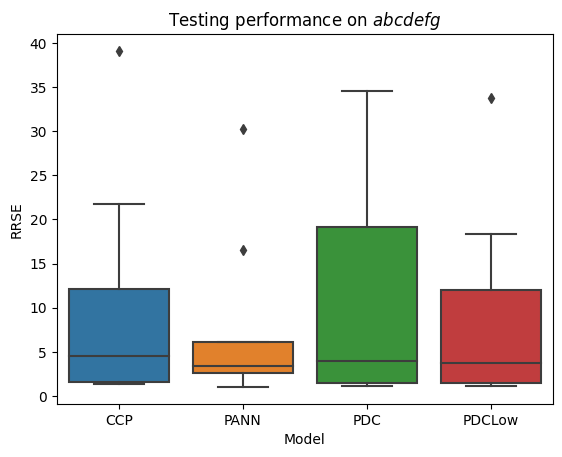

In [2]:
folder_path = r'tb_logs\Polynomials\a_b_c_d_e_f_g'
model_performance = {}
for path, subdirs, files in os.walk(folder_path):
    for name in files:
        if name.endswith("1"):
            model_name = re.findall(r'\\([A-Z]*[a-z]*)\\version', path)[0]
            eventfile_path = os.path.join(path, name)
            event_acc = EventAccumulator(eventfile_path)
            event_acc.Reload()
            model_performance[model_name] = []
            for tag in event_acc.Tags()['scalars']:
                if "rrse" in tag:
                    model_performance[model_name].append(event_acc.Scalars(tag)[-1].value)

ax = sns.boxplot(data=pd.DataFrame.from_dict(model_performance))
ax.set(xlabel="Model", ylabel="RRSE", title="Testing performance on $a b c d e f g$")
fig = ax.get_figure()
#fig.savefig("report\\" + folder_path.split("\\")[-1], bbox_inches="tight")

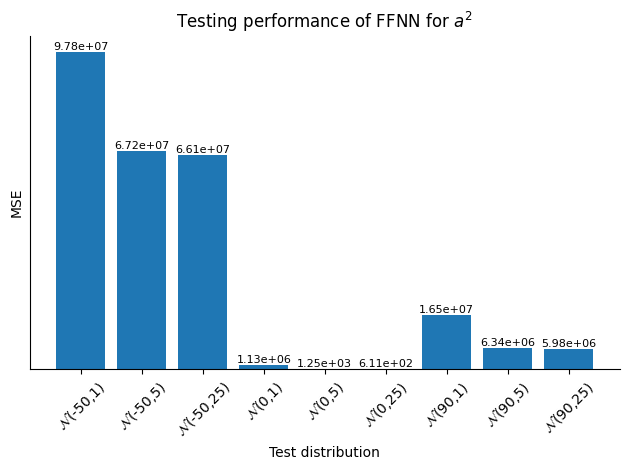

In [8]:
folder_path = r'tb_logs\Polynomials\a2'
model_performance = {}
for path, subdirs, files in os.walk(folder_path):
    for name in files:
        if name.endswith("1"):
            model_name = re.findall(r'\\([A-Z]*[a-z]*)\\version', path)[0]
            eventfile_path = os.path.join(path, name)
            event_acc = EventAccumulator(eventfile_path)
            event_acc.Reload()
            model_performance[model_name] = []
            for tag in event_acc.Tags()['scalars']:
                if "mse" in tag:
                    model_performance[model_name].append(event_acc.Scalars(tag)[-1].value)

data = pd.DataFrame.from_dict(model_performance)[["FFNN"]]
data['mean'] = pd.Series([-50]*3 + [0]*3 + [90]*3)
data['std'] = pd.Series([1, 5 , 25]*3)
fig, ax = plt.subplots()
plt.xticks(rotation=45)
data['dist'] = "$\mathcal{N}$(" + data['mean'].astype(str) + "," + data['std'].astype(str) + ")"
p = ax.bar(data['dist'], data['FFNN'])
rects = ax.patches
labels = data['FFNN'].apply(lambda x: '%.2e' % x).to_list()
ax.bar_label(p, labels, fontsize=8)

ax.tick_params(axis="y", which="both", left=False, labelleft=False)
ax.spines[['right','top']].set_visible(False)
ax.set_ylabel("MSE")
ax.set_xlabel("Test distribution")
ax.set_title("Testing performance of FFNN for $a^2$")
fig.tight_layout()
fig.savefig("report\\FFNN_a2", bbox_inches="tight")

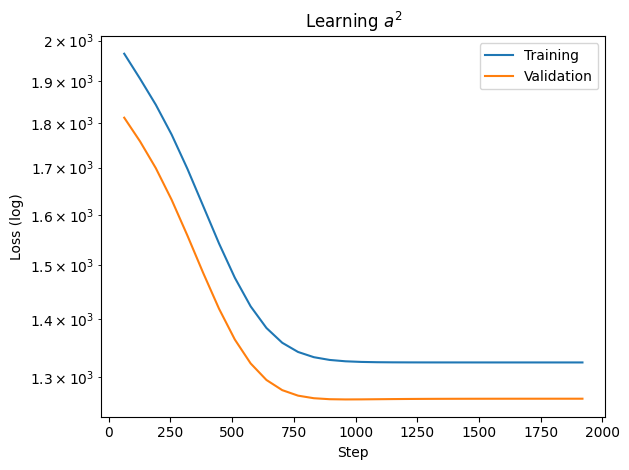

In [10]:
eventfile_path = r'tb_logs\Polynomials\a2\FFNN\version_0\events.out.tfevents.1684230429.JesperPC.7244.0'
event_acc = EventAccumulator(eventfile_path)
event_acc.Reload()
steps = []
train_loss = []
val_loss = []
val_loss_raw = event_acc.Scalars("val_loss")
for i, log in enumerate(event_acc.Scalars("train_loss_epoch")):
    steps.append(log.step)
    train_loss.append(log.value)
    val_loss.append(val_loss_raw[i].value)

fig, ax = plt.subplots()
ax.plot(steps, train_loss, label="Training")
ax.plot(steps, val_loss, label="Validation")
ax.set_yscale("log")
ax.set_ylabel("Loss (log)")
ax.set_xlabel("Step")
ax.set_title("Learning $a^2$")
ax.legend()
fig.tight_layout()
fig.savefig("report\\FFNN_a2_training", bbox_inches="tight")

In [27]:
seq_len = [2, 120]
model_performance = {}
for length in seq_len:
    folder_path = r'tb_logs\Epidemiology\\' + str(length) + "len_1lag"
    model_performance[length] = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if name.endswith("0"):
                model_name = re.findall(r'\\([A-Z]*[a-z]*)\\version', path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
                
                metric_value = 0
                metric_count = 0
                for tag in event_acc.Tags()['scalars']:
                    if "mae" in tag:
                        metric_value += event_acc.Scalars(tag)[-1].value
                        metric_count += 1
                model_performance[length][model_name] = metric_value / metric_count

In [28]:
pd.DataFrame.from_dict(model_performance).T

,CCP,PDC,PDCLow
2,0.007008,0.007065,0.007091
120,0.206437,0.204506,0.210998


Text(0, 0.5, 'MAE')

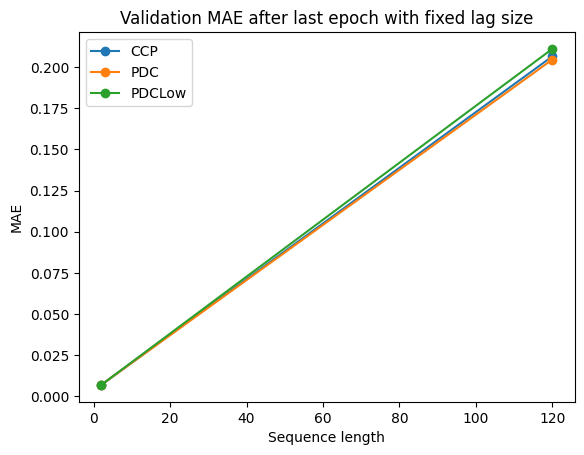

In [30]:
df_models = pd.DataFrame.from_dict(model_performance).T
fig, ax = plt.subplots()
ax.plot(seq_len, df_models['CCP'], "-o", label="CCP")
ax.plot(seq_len, df_models['PDC'], "-o", label="PDC")
ax.plot(seq_len, df_models['PDCLow'], "-o", label="PDCLow")
ax.legend()
ax.set_title("Validation MAE after last epoch with fixed lag size")
ax.set_xlabel("Sequence length")
ax.set_ylabel("MAE")

In [31]:
seq_len = [2, 120]
model_performance = {}
for length in seq_len:
    folder_path = r'tb_logs\Epidemiology\\' + str(length) + "len_1lag"
    model_performance[length] = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if name.endswith("1"):
                model_name = re.findall(r'\\([A-Z]*[a-z]*)\\version', path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
                
                metric_value = 0
                metric_count = 0
                for tag in event_acc.Tags()['scalars']:
                    if "mae" in tag:
                        metric_value += event_acc.Scalars(tag)[-1].value
                        metric_count += 1
                model_performance[length][model_name] = metric_value / metric_count

Text(0, 0.5, 'MAE')

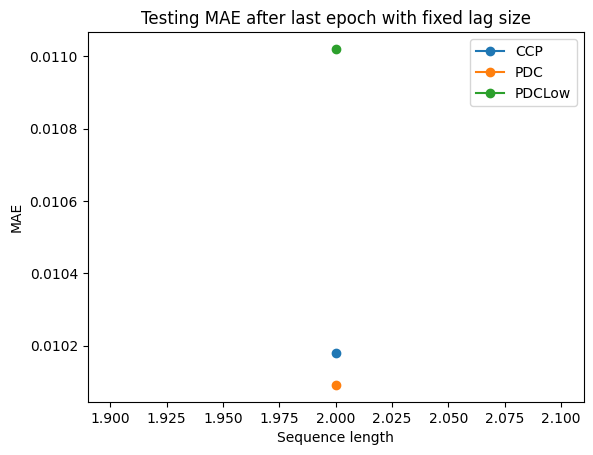

In [33]:
df_models = pd.DataFrame.from_dict(model_performance).T
fig, ax = plt.subplots()
ax.plot(seq_len, df_models['CCP'], "-o", label="CCP")
ax.plot(seq_len, df_models['PDC'], "-o", label="PDC")
ax.plot(seq_len, df_models['PDCLow'], "-o", label="PDCLow")
ax.legend()
ax.set_title("Testing MAE after last epoch with fixed lag size")
ax.set_xlabel("Sequence length")
ax.set_ylabel("MAE")

In [33]:
def test_seq_len_number(number):
    if (number%1 == 0) and (number%2 == 0) and (number%3==0) and (number%4==0) and (number%5==0):
        return True
    else:
        return False

In [32]:
[i for i in range(2, 150) if test_seq_len_number(i)]

[12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144]

In [34]:
[i for i in range(2, 150) if test_seq_len_number(i)]

[60, 120]